# Week 11, Part 1

### Topic
 1. Play with linear fit - in RStudio
 1. Linear regression with Beers vs. Blood Alcohol level
 1. BACK TO SLIDES FOR OUTLIERS
 1. Assessing Outliers
 1. BACK TO SLIDES FOR GOODNESS OF FIT INFERENCE STUFFS



In [1]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=5)

Loading required package: repr


## 1. Play with linear fit - in RStudio

Install some packages:

```r
install.packages("manipulate") # run once
install.packages("tigerstats") # run once

require(tigerstats)
require(manipulate)

FindRegLine()
```

*Play with the above for a bit!*

Note: this is essentially what the computer is doing when you ask it for a linear regression - its trying numbers to get the right slope and intercept.

## 2. Linear regression with Beers vs. Blood Alcohol level

Now, lets work with some real data: the Beers vs. BAC.

BAC = in grams of alcohol per deciliter of blood. BAC is usually what is quoted for blood alcohol level.

This data is from a study of the effects of beer consumption on blood alcohol levels. A group of n=16 student volunteers at The Ohio State University drank a randomly assigned number of beers. Thirty minutes later, a police officer measured their BAC.

Your instincts should tell you about the direction of this relationship – that there is a positive relationship between Beers and BAC, i.e. - if you drink more beer, you're gonna get more drunk.

Read in data, we can do this either from the web:

In [2]:
BB = read.csv("http://www.math.montana.edu/courses/s217/documents/beersbac.csv")

Or we can do it locally:

In [3]:
BB = read.csv('beersbac.csv')

Let's plot this data as vectors:

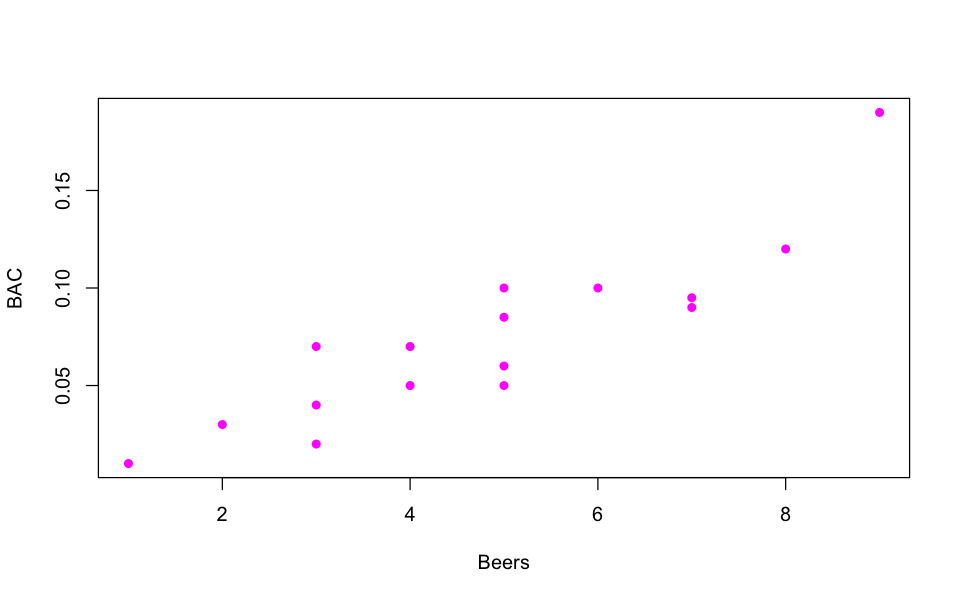

In [4]:
Beers = BB$Beers
BAC = BB$BAC
plot(Beers, BAC, pch=16, col=30)

We can also plot using `BB` as the dataframe:

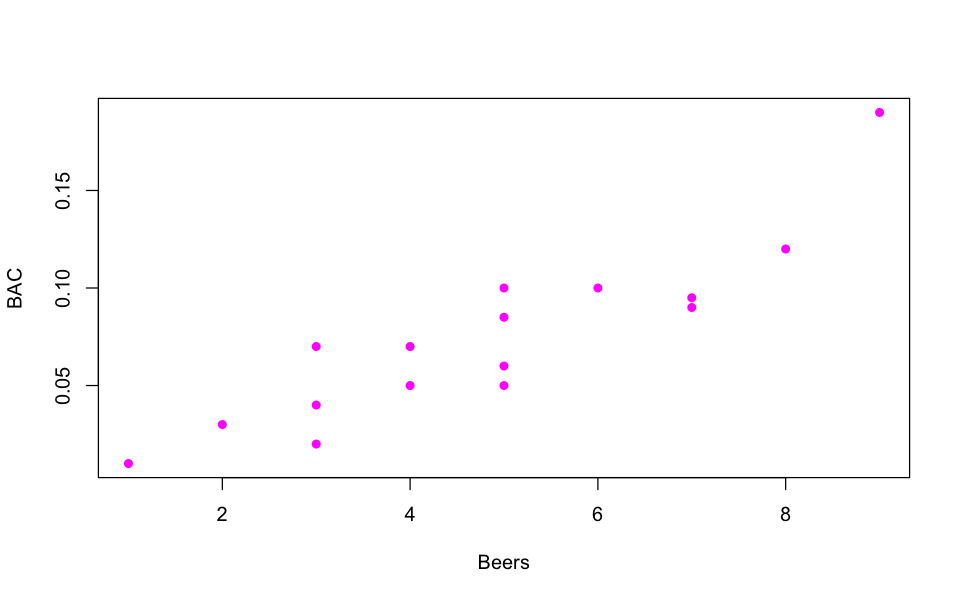

In [5]:
plot(BAC~Beers, data=BB, pch=16, col=30)

Let's first calculate the correlation coefficient to see how "linear" this thing is:

In [6]:
R = cor(Beers,BAC)
print(R)

[1] 0.8943381


So R ~ 0.9, so quite linear & > 0, so positive correlation.

Ok!  Let's get to actually fitting a line to this relation:

In [7]:
myLine = lm(formula = BAC ~ Beers, data = BB)

NOTE: it depends on which is "X" and which is "Y" variable the above statment implies that `BAC` depends on `Beers` (number of beers is explainatory) and not the other way around.

In [8]:
summary(myLine)


Call:
lm(formula = BAC ~ Beers, data = BB)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027118 -0.017350  0.001773  0.008623  0.041027 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.012701   0.012638  -1.005    0.332    
Beers        0.017964   0.002402   7.480 2.97e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02044 on 14 degrees of freedom
Multiple R-squared:  0.7998,	Adjusted R-squared:  0.7855 
F-statistic: 55.94 on 1 and 14 DF,  p-value: 2.969e-06


We see a few things here: we see what the intercept is (Intercept): -0.012701 and what the slope is, labeled in the `Beers` column as 0.017964. There's also a few other numbers we'll get to in a little bit.

Here the slope is saying that for every extra beer we drink, on average, our Blood alcohol level increases by 0.018.

We can easily plot this line using `abline`:

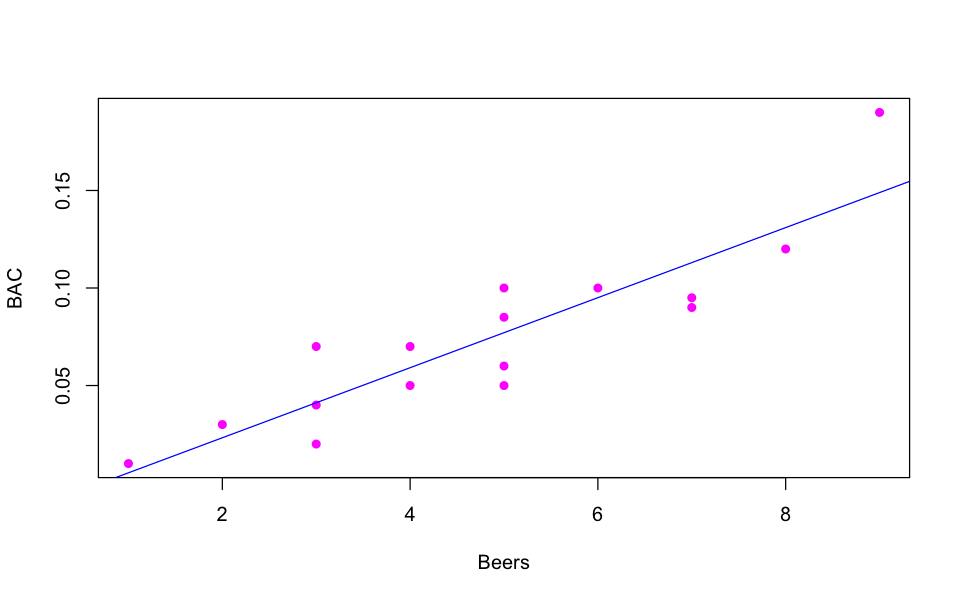

In [9]:
plot(Beers, BAC, pch=16, col=30)
abline(myLine,col="blue")

Maybe we want to extract the coefficients and plot our own line somewhere.

We can do this with:

In [10]:
b0 = myLine$coefficients[1] # intercept
b1 = myLine$coefficients[2] # slope

Now, let's plot a line using these coefficients:

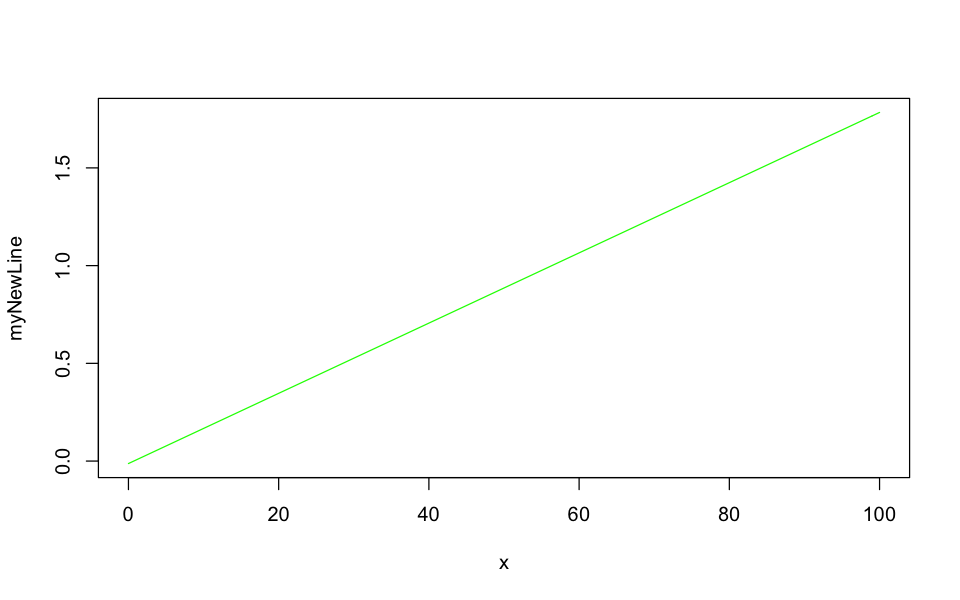

In [11]:
x = seq(0, 100) # # of beers 
myNewLine = b0 + b1*x

plot(x, myNewLine, type='l', col="green")

Now, you can see that we have here done the dangerous EXTRAPOLATION. We can, for example overplot where a fatal does of alcohol is:

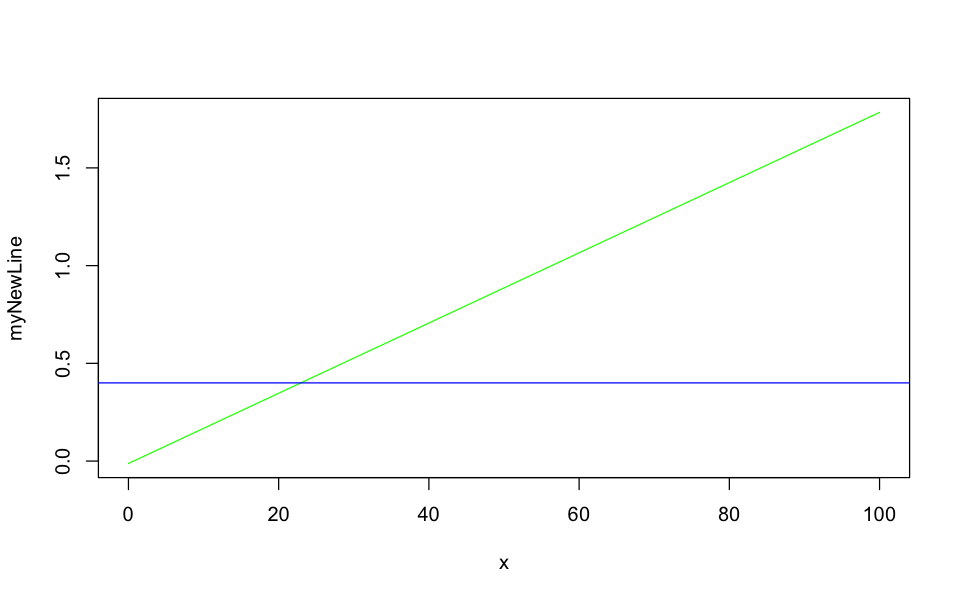

In [12]:
plot(x, myNewLine, type='l', col="green")
abline(h=0.4, col="blue") # note, this is an average, a heavy drinker can get up to about 0.8

So clearly, someone can't drink 100 beers in a limited time span since they would likely be dead. Let's replot to about 20 beers and take a look:

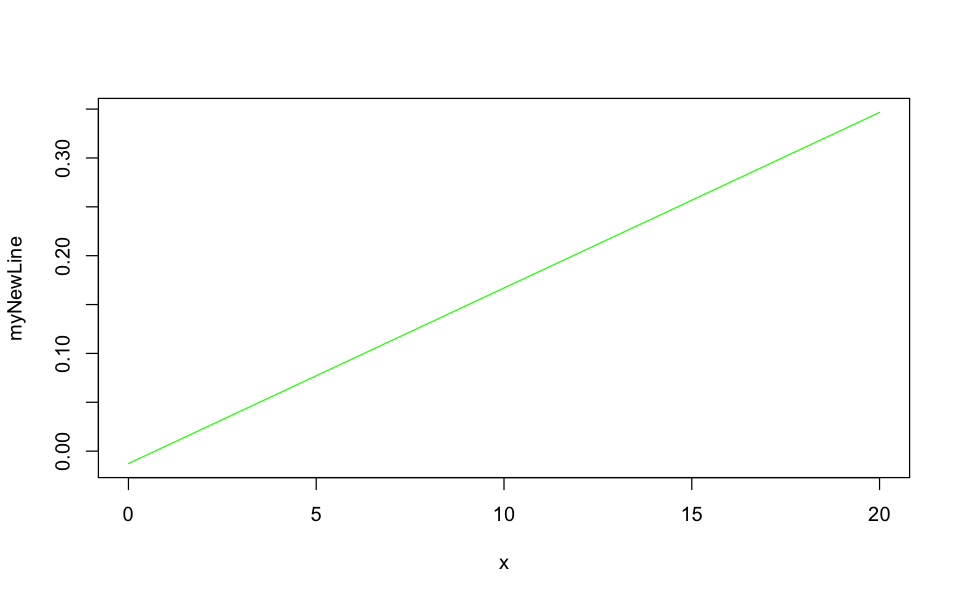

In [13]:
x = seq(0,20)
myNewLine = b0 + b1*x

plot(x, myNewLine, type='l', col="green")

Another thing we can note is that for 0 beers the BAC measurement is negative, i.e. there is a negative blood alcohol level projected.  Of course, this doesn't make sense - at zero beers, there should be about 0% blood alcohol level.

Let's overplot our points again and take a look:

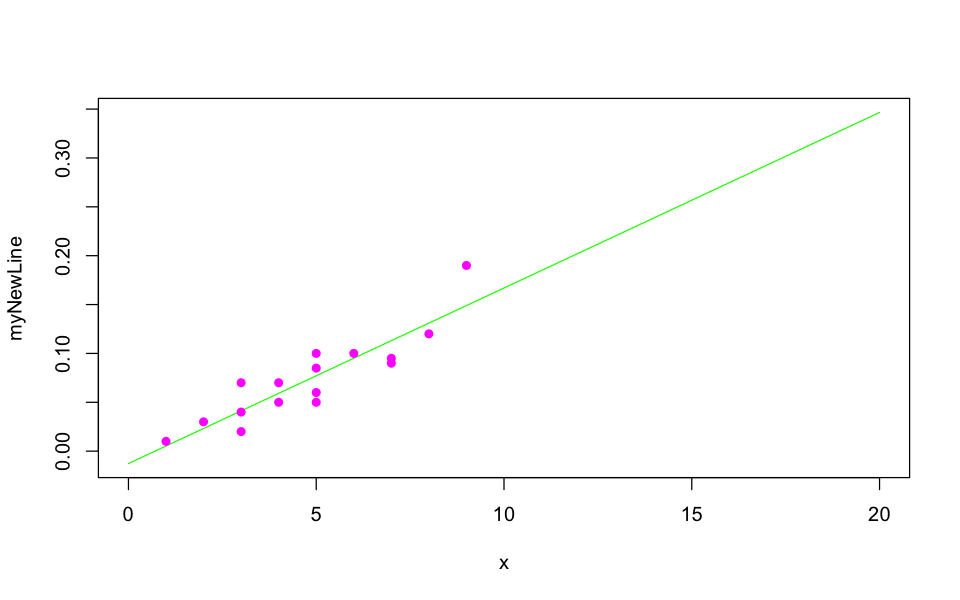

In [14]:
plot(x, myNewLine, type='l', col="green")
points(Beers, BAC, pch=16, col=30)

Looking at this we can see that out side of a few & ~10 beers we are essentially extrapolating - so, we really can't make predictions there.

What if we want to know what the predicted BAC is for 4.5 beers?  We can use our line information since we don't have an observation there to estimate this value.

There are a few ways to do this, we can try making our own function:

In [15]:
myLineFunction = function(xInput){
  return(b0 + b1*xInput)
}

print(myLineFunction(4.5))

(Intercept) 
 0.06813632 


Note by default, a "label" is added to the data and we get whatever default naming comes along with `b0` and `b1` -- in this case the default is the label for `b0`.  We can take off the labels and just calculate the value by using the `unname` function:

In [16]:
myLineFunction = function(xInput){
  return(unname(b0) + unname(b1)*xInput)
}

print(myLineFunction(4.5))

[1] 0.06813632


We can check this on our graph and see this seems to be approximately where we would expect **DO BY HAND ON YOUR OWN**

We talked a bit about residuals and that they are how "off" each point is from our line fit, but lets actually plot them:

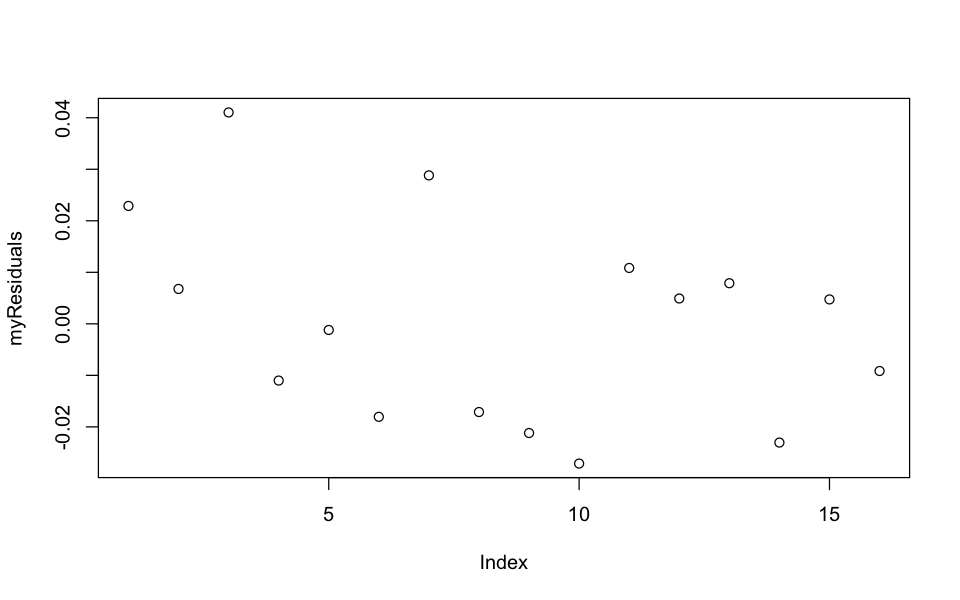

In [17]:
myResiduals = resid(myLine)
plot(myResiduals)

We can also plot the line for a perfect linear fit (all residuals = 0):

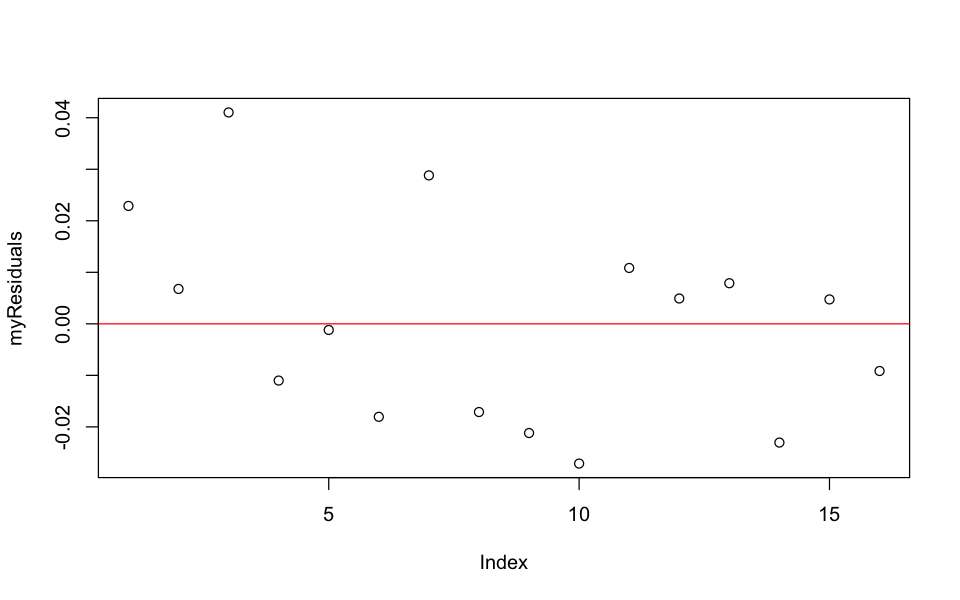

In [18]:
plot(myResiduals)
abline(h=0.0, col="red")

From this residual plot, we can see that there *might* be some underlying structure here, but it is hard to tell for sure.

We can also check if our residuals are normal (one of our fit conditions):

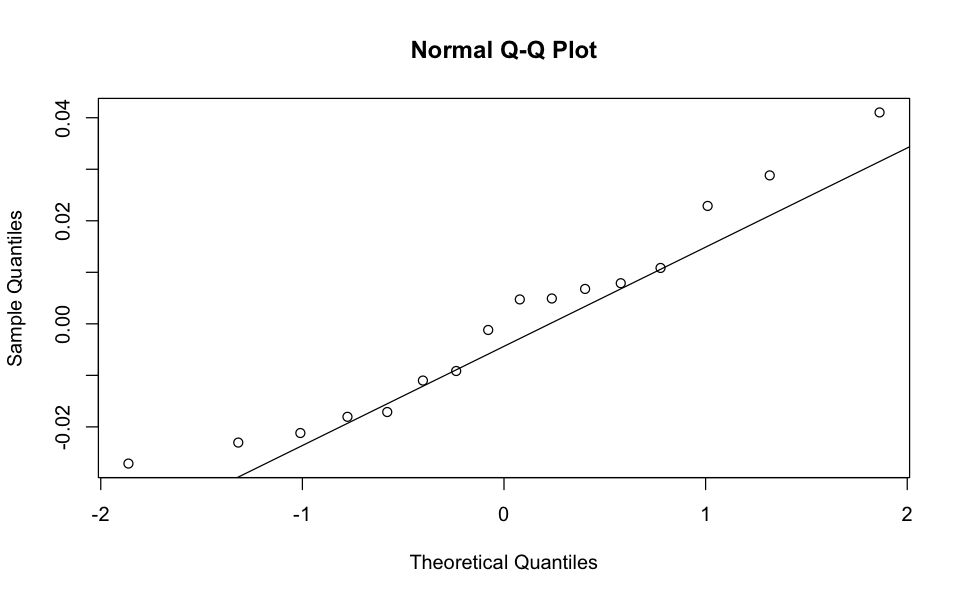

In [19]:
qqnorm(myResiduals)
qqline(myResiduals)

So, we can see that our residuals are nearly normal.

We can also combine plots to look at all our things of interest at once.

Maybe we want to plot our line, the fit, and the residuals:

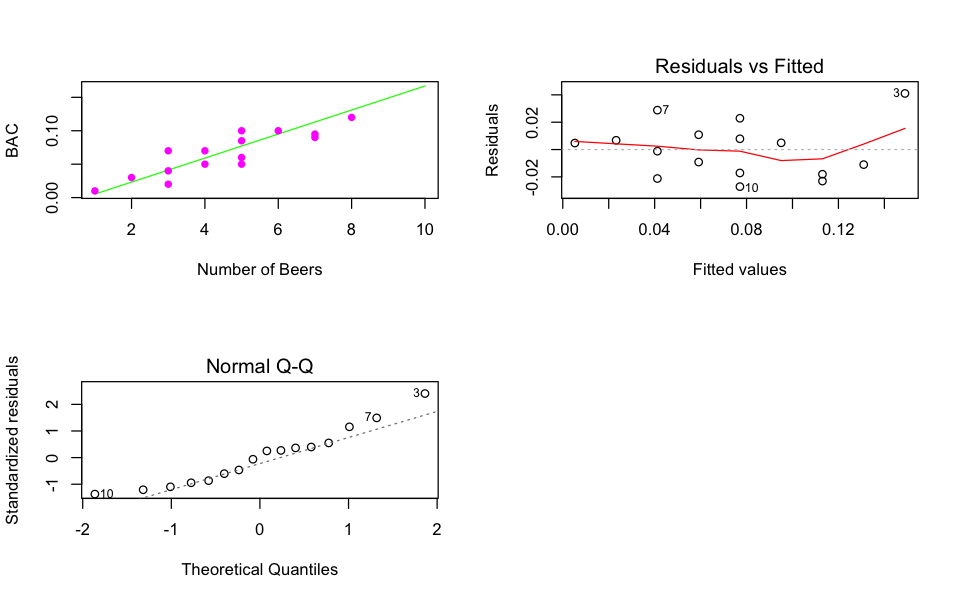

In [20]:
par(mfrow=c(2,2))

x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")
points(Beers, BAC, pch=16, col=30) # over plot observation points

plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

We can also redo this plot using a fancy layout:

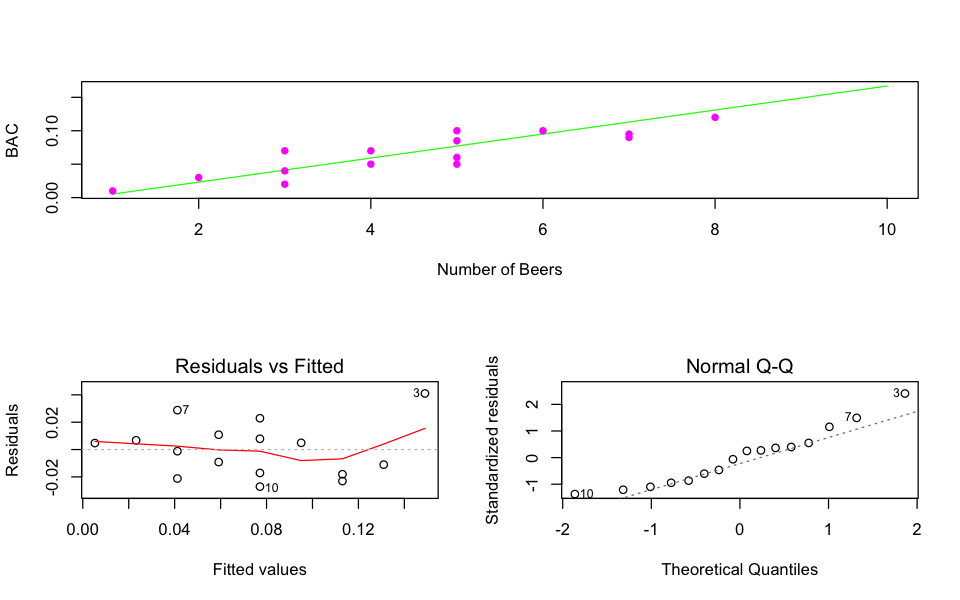

In [21]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE)) # this makes a 2x2 or 4 plots and makes 1 on the top row
x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")
points(Beers, BAC, pch=16, col=30) # over plot observation points

plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

The numbers in the layout call give you the order of plots, so, for example, we can change what gets plotted where:

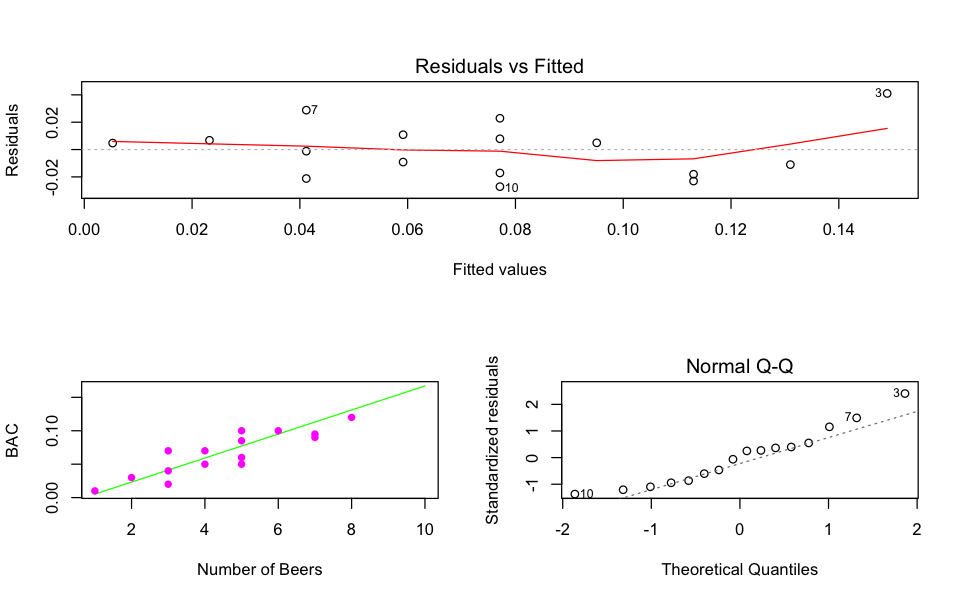

In [22]:
layout(matrix(c(2,2,1,3), 2, 2, byrow = TRUE)) # this makes a 2x2 or 4 plots and makes 1 on the top row
x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")
points(Beers, BAC, pch=16, col=30) # over plot observation points

plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

btw: what are those numbers on the bottom 2 plots?  they just refer to the "labels" of the points

In [23]:
print(Beers)

 [1] 5 2 9 8 3 7 3 5 3 5 4 6 5 7 1 4


You can see that the 3rd observation corresponds to the value 9, and the point labeled "3" in the QQ plot.

Finally, lets test the "goodness" of our fit by calculating R2 aka the amount of variation of our points from our fit line:

In [24]:
R2 = R*R
print(R2)

[1] 0.7998407


This roughly means that about 80% of the variation in our points is explained by the fact that they are on a line.

## 3. BACK TO SLIDES FOR OUTLIERS

## 4. Assessing Outliers

Ok, lets go back to some of our plots we made before:

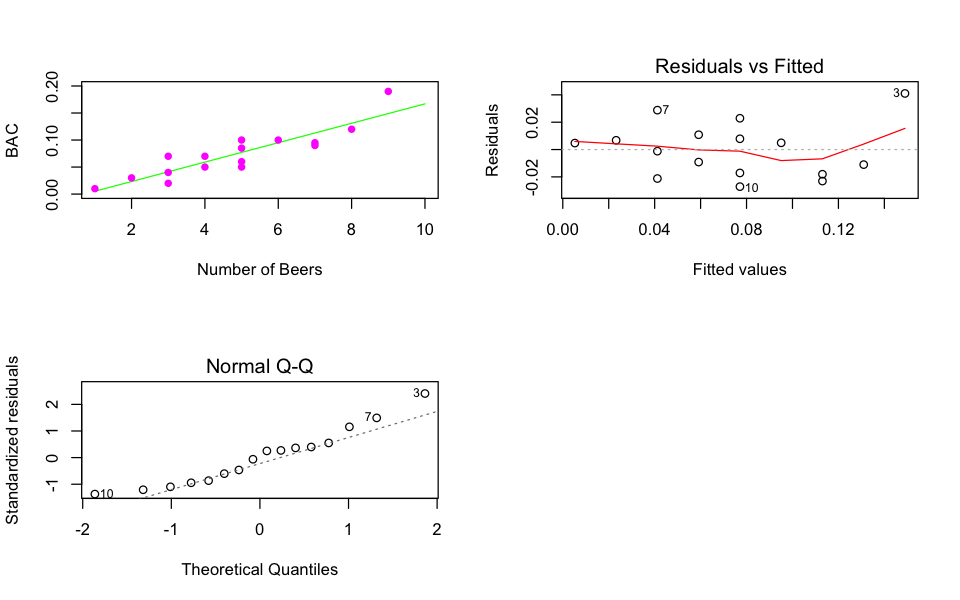

In [25]:
par(mfrow=c(2,2))
x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', 
     col="green", xlab="Number of Beers", ylab="BAC",
     ylim=c(0,0.2))
points(Beers, BAC, pch=16, col=30) # over plot observation points
plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

Now, lets add another plot to our meagurie

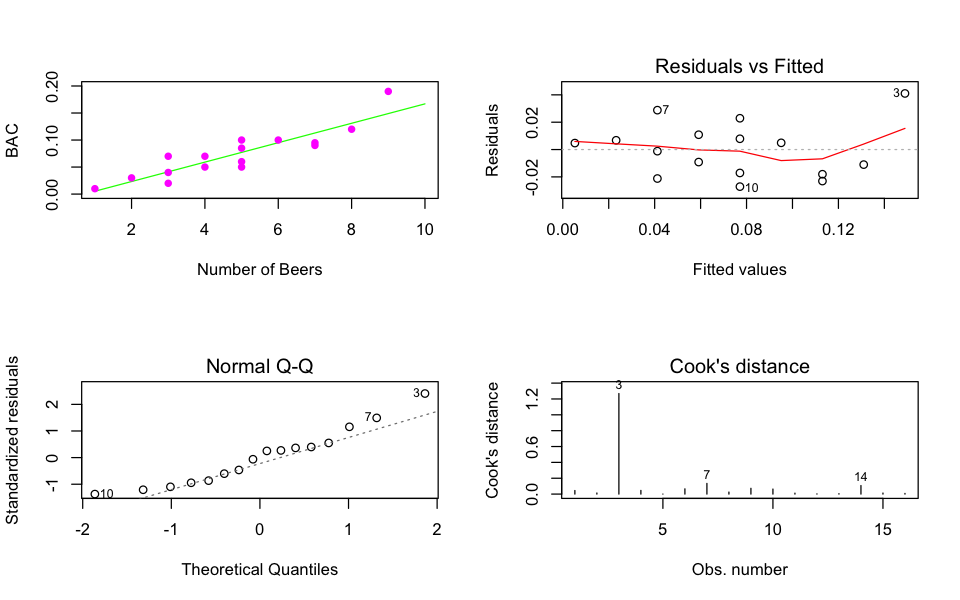

In [26]:
par(mfrow=c(2,2))
x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', 
     col="green", xlab="Number of Beers", ylab="BAC",
     ylim=c(0,0.2))
points(Beers, BAC, pch=16, col=30) # over plot observation points
plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

# new plot
plot(myLine, which=4) # Outliers plot, Cooks distance

The cooks distance is a measure the influence that each point has on the regression line. It also is a positive measure with higher values suggesting more influence. The rule of thumb is that Cook’s D values over 1.0 correspond to clearly influential points, values over 0.5 have some influence and values lower than 0.5 indicate points that are not influential on the regression model slope coefficients

There is a significant amount of math that goes into the calculation of cook's D that we are glazing over at the moment.  Its related to "cross validation" methods that we'll be discussing in a few weeks, so stay tuned for that!

If you really wanna know:
$D_i = \frac{e_i^2}{p \times MSE} \times \frac{h_{ii}}{(1-h_{ii})^2}$
 * where $e_i$ is the ith residual
 * MSE is the Mean Square Error (sum of residuals)
 * p is # of parameters (2 in this case)
 * $h_{ii}$ is the leverage: $h_{ii} = \frac{d\hat{y}_i}{d y_i}$ where $\hat{y}$ is fitted, $y_i$ is measured

So here, we see that one of our "3" beers is definitely a influential point $\rightarrow$ this is the point at 9 Beers, near 0.2 BAC

We can also plot this another way:

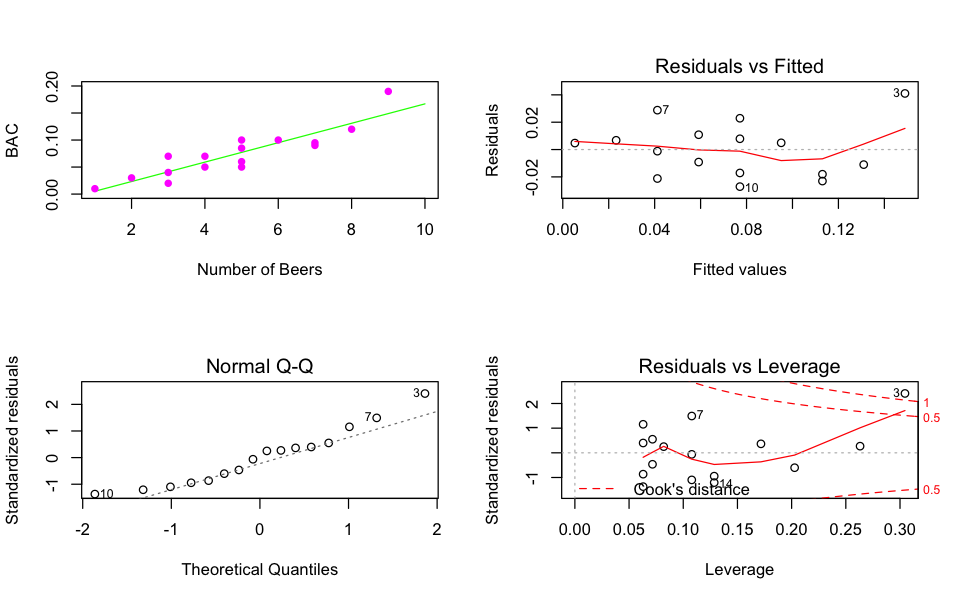

In [27]:
par(mfrow=c(2,2))
x = seq(1, 10)
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', col="green", 
     xlab="Number of Beers", ylab="BAC",
     ylim=c(0,0.2))
points(Beers, BAC, pch=16, col=30) # over plot observation points
plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

# Now, lets add another plot to our meagurie
plot(myLine, which=5) # residuals vs. leverage

Again, high leverage *can* lead to a point being influential, esp. if the cook's distance is > 1.

So this is giving us a sense of if the point with high leverage (cook's distance > 1) is influential and in which direction. Here we see the upper value of "3" beers is creating leverage.

Let's work through a few examples.

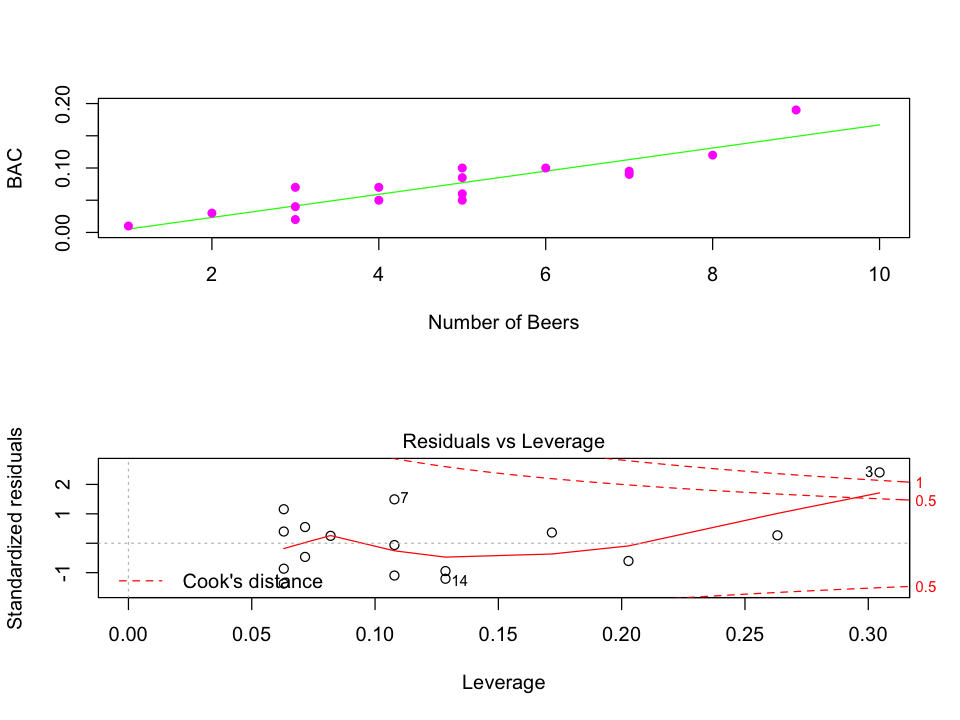

In [28]:
options(repr.plot.width=8, repr.plot.height=6)

par(mfrow=c(2,1))
plot(x, myNewLine, type='l', col="green", 
     xlab="Number of Beers", ylab="BAC",
     ylim=c(0,0.2))
points(Beers, BAC, pch=16, col=30) # over plot observation points
plot(myLine, which=5) # residuals vs. leverage

This again is our original plot.  Now, lets add something at 10 beers to fake some outliers and see how our plots change.

In [29]:
new_Beers = c(Beers, 10)
new_BAC = c(BAC, 0.01)
new_BB = data.frame(new_Beers,new_BAC)

Plot original line:

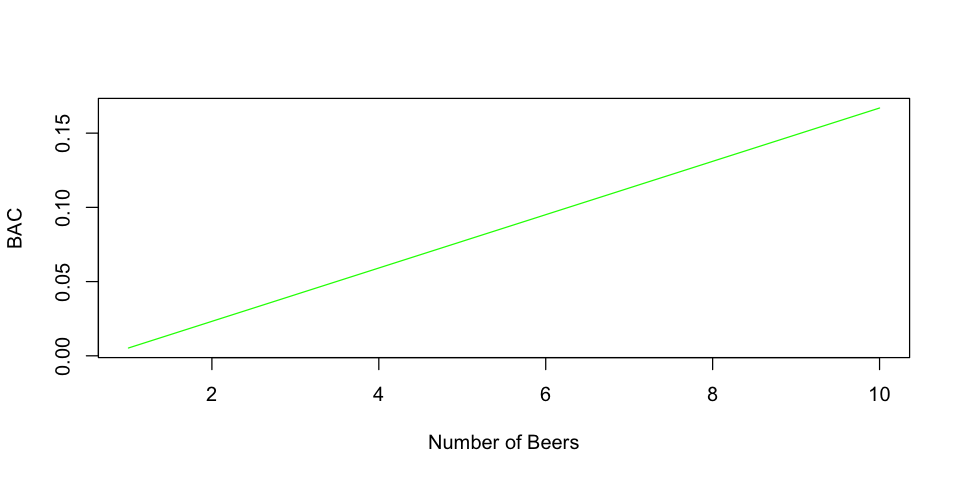

In [30]:
options(repr.plot.width=8, repr.plot.height=4)

plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")

Construct new linear regression for new points:

In [31]:
new_myLine = lm(formula = new_BAC ~ new_Beers, data = new_BB)
new_b0 = new_myLine$coefficients[1] # intercept
new_b1 = new_myLine$coefficients[2] # slope

Plot original fit and new points:

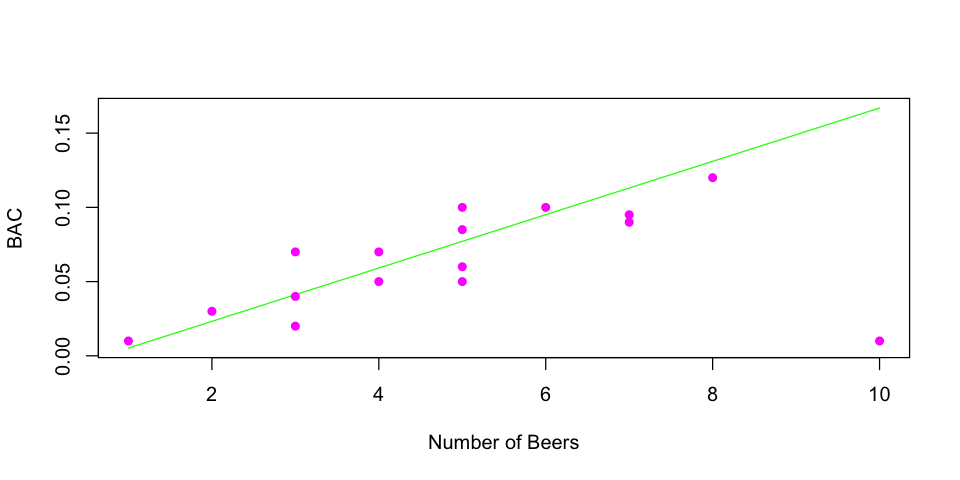

In [32]:
plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")
points(new_Beers, new_BAC, pch=16, col=30) # over plot observation points

Let's compare this to the updated linear regression we calculated above:

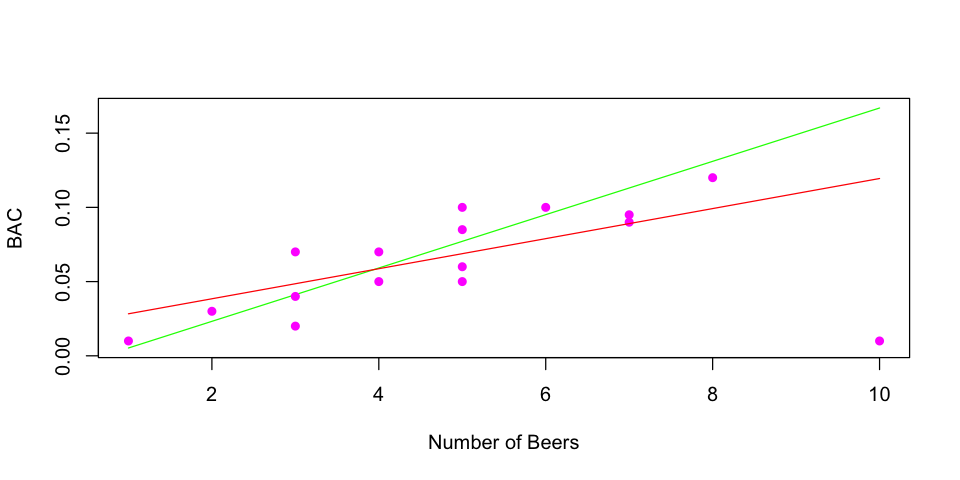

In [33]:
plot(x, myNewLine, type='l', col="green", xlab="Number of Beers", ylab="BAC")
points(new_Beers, new_BAC, pch=16, col=30) # over plot observation points

new_myNewLine = new_b0 + new_b1*x
lines(x, new_myNewLine, col="red")

We can see, compared to our old slope and intercept, things have really changed!

We can see this more quantitatively using our residuals vs. leverage plot:

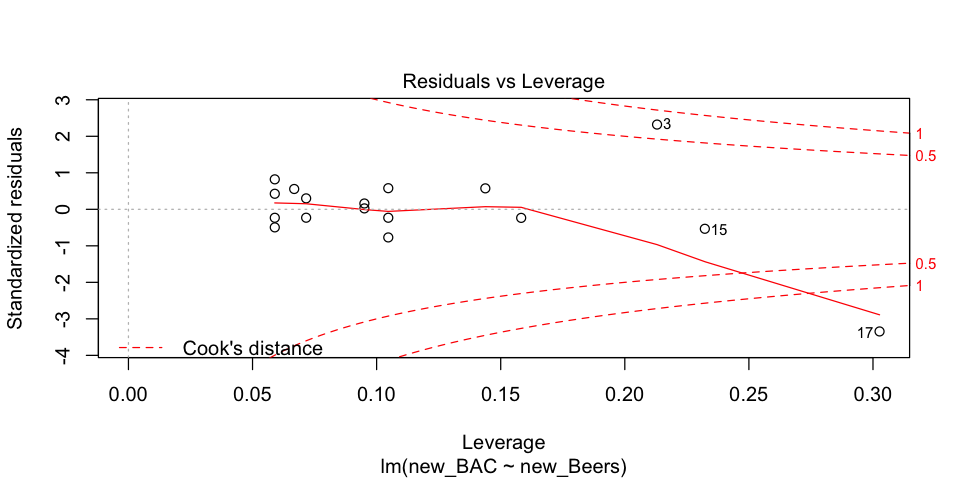

In [34]:
plot(new_myLine, which=5) # residuals vs. leverage

Now we can see that our new "added" 17th point is pulling the slope down.

We can do the same thing and increase the slope **go back and add points 10 & 0.5 on your own**

Finally, we can see how our "goodness of fit" parameters change with these different points:

In [35]:
new_R = cor(new_Beers,new_BAC)
print("New R, R^2")
print(c(new_R, new_R*new_R))

[1] "New R, R^2"
[1] 0.550755 0.303331


## 5. BACK TO SLIDES FOR GOODNESS OF FIT INFERENCE STUFFS